## LINEAR REGRESSION PROJECT

### GOAL
The Goal of this project is to create a Linear Regression Model, train it on the data with the optimal parameters using a grid search, and then evaluate the model's capabilities on a test set.

### DATASET 
The dataset used for this project is the **Ames Iowa Data Set** : http://jse.amstat.org/v19n3/decock.pdf

the first step in building a ML model for training is understanding the Dataset that will be used, we analyze the data to seperate it into features and models and also check for missing or null values. if there are some missing values we must perform data cleaning and feature engineering on the dataset.

### DATA CLEANING & FEATURE ENGINEERING

In [1]:
# import Libraries that would be used for data analysis and feature engineering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in the dataset
Raw_Housing_Data = pd.read_csv("..\DATA\Ames_Housing_Data.csv")

In [21]:
# read in description of the dataset
with open('../DATA/Ames_Housing_Feature_Description.txt','r') as f: 
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [3]:
Raw_Housing_Data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
Raw_Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

from the above we can already see that the dataset has some missing data. 
to clean this data and make it better for the model we can try to find outliers and missing data, analyze to know the best approach for each senerio. 
note that there is no 1 size fit all for Data Cleaning, decisions made on deleting, filling or augumenting data requires Domain knowledge and understaning of the problem we are trying to solve. 

in this particular senerio, we are trying to predict the sale price of a future house, so that is obviously the label. what can be done is to check for correlations between the sale price and other features and also check if there are houses with sale price that are outliers. 

### DEALING WITH OUTLIERS

In [8]:
Raw_Housing_Data.corr(numeric_only=True)["SalePrice"].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

from the above we can see the features that are most correlated with the sale price that we are trying to predict. 
we can further analize these highly correlating features and the sale price further

<Axes: xlabel='SalePrice', ylabel='Overall Qual'>

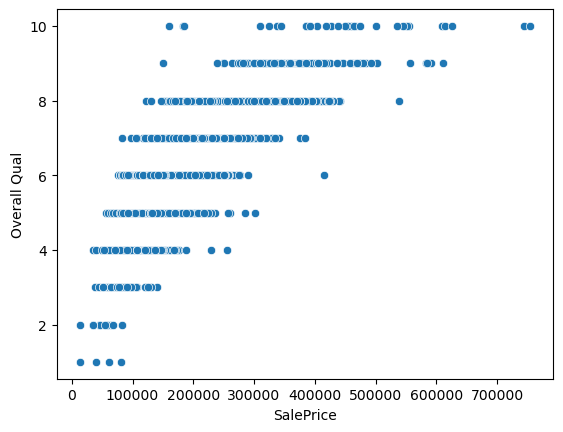

In [12]:
# Overall Quality and sale price analysis
sns.scatterplot(data=Raw_Housing_Data, x="SalePrice", y="Overall Qual")

from the above we notice that there is an normal distribution, ie houses with higher quality sell for higher prices. but from the visualization, we notice that some houses (eg on the top left) have a very high quality but are selling at very low prices those could be outliers as they they do not follow the trend we can see in our dataset. also notice on the other hand (top right) there are some houses that are selling for extremely high prices. 

<Axes: xlabel='SalePrice', ylabel='Gr Liv Area'>

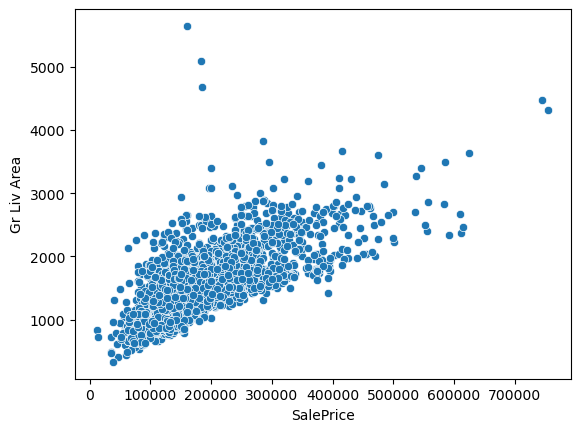

In [13]:
# General living area vs sale price
sns.scatterplot(data=Raw_Housing_Data, x="SalePrice", y="Gr Liv Area")

again we notice that some houses (top left) that have a large living area are selling for a low price. these type of data goes against the general trend of the data (higher quality of house = higher sale price) and they could reduce the efficency of the model to predict future prices. even if they are a few houses that are selling for really high prices, we are not bothered about that for now as they also follow the general trend in the data because they also have the highest living area and overall quality available in the dataset. 

the "outliers" identified in this plot might be the same data that we noticed in the previous plot. so lets try to get them out for further analysis.

In [14]:
Raw_Housing_Data[(Raw_Housing_Data["SalePrice"]<200000) & (Raw_Housing_Data["Gr Liv Area"]>4000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


it is important to note that further analysis could be done to know why those data points have a diffrent behaviour than expected from the trend in the dataset, because generally speaking the more the data the better the model would perform. example we could check to know the year they were build and if they are the most recent it is possible that houses in that area with same features have a new valuation. this is why domain knowledge is very important.

considering the size of the dataset, the number of these "outliers" and the number of houses we have to train our model on, it is safe to drop these particular houses from the dataset so they dont affect the models predictive ability.

In [18]:
index_to_delete = Raw_Housing_Data[(Raw_Housing_Data["SalePrice"]<200000) & (Raw_Housing_Data["Gr Liv Area"]>4000)].index

In [19]:
Raw_Housing_Data = Raw_Housing_Data.drop(index_to_delete, axis=0)

<Axes: xlabel='SalePrice', ylabel='Gr Liv Area'>

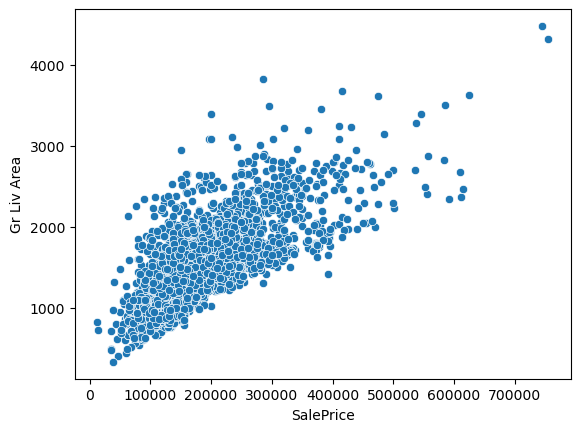

In [20]:
sns.scatterplot(data=Raw_Housing_Data, x="SalePrice", y="Gr Liv Area")

visualizing the same corelation again we can observe that most data points are in line with the general trend of the data. 

now that we have a better dataset without outliers that goes against the trend in the data, we can further clean up the data by searching for missing data and deciding what how to fix them. they are various ways to do this, we could fill the data, or delete the data, it depends on the context.

if we read our dataset we notice a PID feature, from the dataset description we know this is a unique id for each data in the dataset. this deature has nothing to do with the price that we are trying to predict and our dataset already has unique ID as the index, so to begin we can either make the PID the index of the dataframe or delete it from the dataframe. 

In [23]:
# drop the PID feature from the dataset
Raw_Housing_Data = Raw_Housing_Data.drop("PID", axis=1)
Raw_Housing_Data.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### DEALING WITH MISSING DATA

the first step in fixing missing data is to find what features has missing data and what pacentage of that feature is missing. this could help us decide if we would drop the feature completely. 

In [25]:
# isnull function returns True for a missing value and False otherwise.
#since pyton interprets trues as 1 and false as 0, we can call the sum on this to get the total of missing values per feature
Raw_Housing_Data.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [26]:
# to know the percentage of the feature that is missing, we can divide by the total number for each feature ie length.
100 * Raw_Housing_Data.isnull().sum()/ len(Raw_Housing_Data)

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [36]:
#because we would check for missing data in most data sets while cleaning making the above a function might be a good idea
#the function can find all the missing data, get the pacentage of the feature that is missing some data then sort it for easier visualization.
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

missing_data_percent = percent_missing(Raw_Housing_Data)
missing_data_percent

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

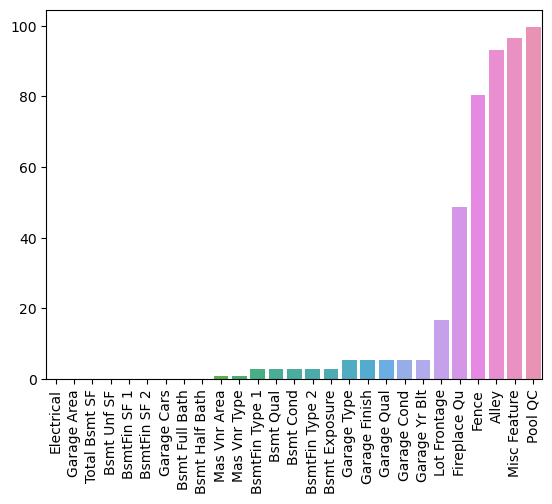

In [41]:
#visualize the data
sns.barplot(x=missing_data_percent.index, y=missing_data_percent)
plt.xticks(rotation=90);

now we can see the % we are missing per feature and this can help decided how to deal with the missing data. we can analyse what feature to drop and which feature to drop some few roles / data from, or what feature might have a missing value as 0 and could be filled in. 

focusing on the features that have very small % of its data missing (features on the left of the plot above) we can consider droping few rows or filling them with a statistical / reasonable assumbption based off domain knoledge. we can start by considering roles missing 1% of data

(0.0, 1.0)

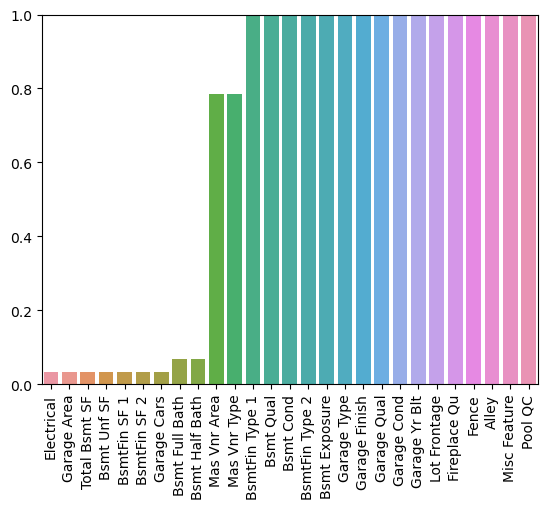

In [42]:
sns.barplot(x=missing_data_percent.index, y=missing_data_percent)
plt.xticks(rotation=90);
plt.ylim(0,1)

In [45]:
missing_data_percent[missing_data_percent < 1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [50]:
Raw_Housing_Data[Raw_Housing_Data["Garage Cars"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2236,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


In [47]:
Raw_Housing_Data[Raw_Housing_Data["Electrical"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [48]:
Raw_Housing_Data[Raw_Housing_Data["Garage Area"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2236,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


the 3 features analysed showed that the same house is missing both Garage Cars and Garage Area, more data is always good but considering the number of houses we have in this 2 dataset, it is ok to drop these 2 off.

In [51]:
Raw_Housing_Data = Raw_Housing_Data.dropna(axis=0, subset=["Electrical", "Garage Area"])

now we can recalculate our missing percentage and see the changes in the data

In [53]:
missing_data_percent = percent_missing(Raw_Housing_Data)
missing_data_percent[missing_data_percent < 1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

(0.0, 1.0)

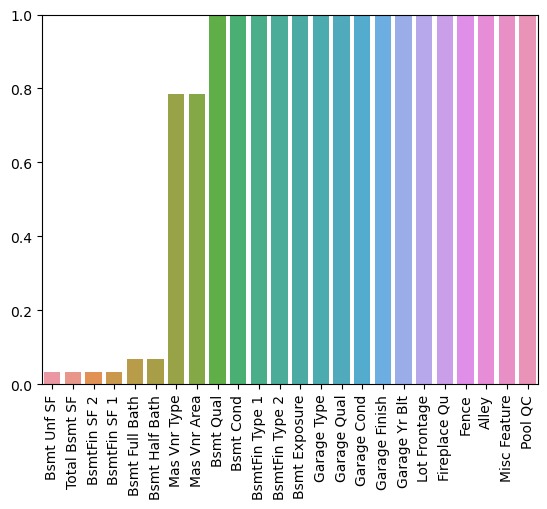

In [54]:
sns.barplot(x=missing_data_percent.index, y=missing_data_percent)
plt.xticks(rotation=90);
plt.ylim(0,1)

just by dropping those 2 rows missing garage area and electrical we have also removed from our missing data because some of those rows were also missing other features

we can analyze other features that are missing less than 1 percent like the basement full bath feature. 

In [46]:
Raw_Housing_Data[Raw_Housing_Data["Bsmt Half Bath"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [55]:
Raw_Housing_Data[Raw_Housing_Data["Bsmt Full Bath"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


notice that basement full bath and half bath is missing from the same 2 rows. and from our visualization we can tell that other features with missing are also related to basement, so it is possible those houses does not have a basement that is why they have missing values for all the basement features. 

from the description of the dataset, we can find that basement valuses are either categorical(good, bad, etc) or numerical and NA means no basement. so we can fill in the missing numerical basement values with 0 and the missing categorical basement values with string none.

In [56]:
# fill in missing basment numeric values

bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
Raw_Housing_Data[bsmt_num_cols] = Raw_Housing_Data[bsmt_num_cols].fillna(0)


# fill in missing basement catigorical values

bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
Raw_Housing_Data[bsmt_str_cols] = Raw_Housing_Data[bsmt_str_cols].fillna('None')

C:\Users\AKPASI\AppData\Local\Temp\ipykernel_14756\3621617550.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Raw_Housing_Data[bsmt_num_cols] = Raw_Housing_Data[bsmt_num_cols].fillna(0)
C:\Users\AKPASI\AppData\Local\Temp\ipykernel_14756\3621617550.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Raw_Housing_Data[bsmt_str_cols] = Raw_Housing_Data[bsmt_str_cols].fillna('None')


In [57]:
Raw_Housing_Data[Raw_Housing_Data["Bsmt Full Bath"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


we have filled in values for the missing basement features, now we can recalculate the missing data percentage to visualizew the diffrence in data. 

In [58]:
missing_data_percent = percent_missing(Raw_Housing_Data)
missing_data_percent[missing_data_percent < 1]

Mas Vnr Type    0.786325
Mas Vnr Area    0.786325
dtype: float64

(0.0, 1.0)

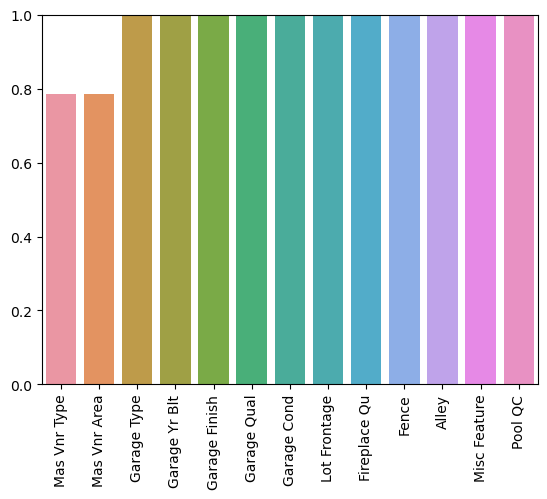

In [60]:
sns.barplot(x=missing_data_percent.index, y=missing_data_percent)
plt.xticks(rotation=90);
plt.ylim(0,1)

by filling those basement values we have reduced features with missing data that is less than 1 %. 

In [62]:
Raw_Housing_Data[Raw_Housing_Data["Mas Vnr Type"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
55,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
484,60,RL,NaN,12891,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,257500
517,20,FV,90.0,7993,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2009,New,Partial,225000
538,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
867,60,RL,70.0,8749,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2009,WD,Normal,198500
1095,60,RL,NaN,7750,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,176000
1119,20,RL,87.0,10037,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,247000
1122,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
1127,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
1184,60,FV,NaN,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,205000


In [74]:
Raw_Housing_Data[Raw_Housing_Data["Mas Vnr Type"].isnull()]["Mas Vnr Type"]

55      NaN
484     NaN
517     NaN
538     NaN
867     NaN
1095    NaN
1119    NaN
1122    NaN
1127    NaN
1184    NaN
1454    NaN
1727    NaN
1751    NaN
1783    NaN
1799    NaN
1839    NaN
1840    NaN
2229    NaN
2260    NaN
2382    NaN
2392    NaN
2455    NaN
2823    NaN
Name: Mas Vnr Type, dtype: object

comparing the last 2 features that has less than 1 % of missing data, we can find that the value is NAN and the 2 features are missing from the same set of houses. going back to the description, we can tell that Mas Vnr Type and Mas Vnr Area being missing (NaN) is likely to mean the house simply just doesn't have a masonry veneer, in which case, we will fill in this data as we did before for the set of basement features missing data. 

In [75]:
Raw_Housing_Data["Mas Vnr Type"] = Raw_Housing_Data["Mas Vnr Type"].fillna("None")
Raw_Housing_Data["Mas Vnr Area"] = Raw_Housing_Data["Mas Vnr Area"].fillna(0)

C:\Users\AKPASI\AppData\Local\Temp\ipykernel_14756\915400413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Raw_Housing_Data["Mas Vnr Type"] = Raw_Housing_Data["Mas Vnr Type"].fillna("None")
C:\Users\AKPASI\AppData\Local\Temp\ipykernel_14756\915400413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Raw_Housing_Data["Mas Vnr Area"] = Raw_Housing_Data["Mas Vnr Area"].fillna(0)


In [76]:
missing_data_percent = percent_missing(Raw_Housing_Data)
missing_data_percent[missing_data_percent < 1]

Series([], dtype: float64)

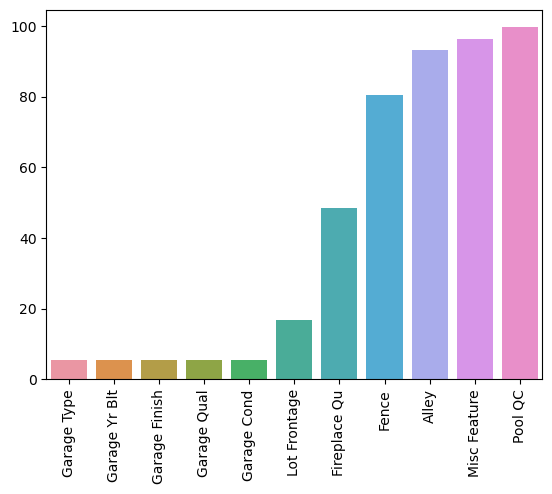

In [77]:
sns.barplot(x=missing_data_percent.index, y=missing_data_percent)
plt.xticks(rotation=90);

after filling those up we see that our dataset no longer have features missing less than 1 % of the whole feature.

now we can move onto the other features that have missing data. lets analyze the garage features

In [78]:
Raw_Housing_Data[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Finish,Garage Qual,Garage Cond
0,Attchd,Fin,TA,TA
1,Attchd,Unf,TA,TA
2,Attchd,Unf,TA,TA
3,Attchd,Fin,TA,TA
4,Attchd,Fin,TA,TA
...,...,...,...,...
2925,Detchd,Unf,TA,TA
2926,Attchd,Unf,TA,TA
2927,NaN,NaN,NaN,NaN
2928,Attchd,RFn,TA,TA


from the dataset description, on the garage features, NaN vlues seem to indicate no garage, so we will substitute with "None" or 0.

In [79]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
Raw_Housing_Data[gar_str_cols] = Raw_Housing_Data[gar_str_cols].fillna('None')

In [80]:
Raw_Housing_Data['Garage Yr Blt'] = Raw_Housing_Data['Garage Yr Blt'].fillna(0)

In [81]:
missing_data_percent = percent_missing(Raw_Housing_Data)
missing_data_percent

Lot Frontage    16.752137
Fireplace Qu    48.547009
Fence           80.478632
Alley           93.230769
Misc Feature    96.410256
Pool QC         99.589744
dtype: float64

we have fixed features missing a small percent of the total feature. Our previous approaches were based more on rows missing data, now we will take an approach based on the column features themselves, since larger percentages of the data appears to be missing.

if 99% of rows are missing a feature, it will not be predictive, since almost all the data does not have any value for it. In our particular data set, many of these high percentage NaN features are actually plasceholders for "none" or 0. But for the sake of showing variations on dealing with missing data, we will remove these features, instead of filling them in with the appropriate value.

In [83]:
Raw_Housing_Data[['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature','Pool QC']]

,Lot Frontage,Fireplace Qu,Fence,Alley,Misc Feature,Pool QC
0,141.0,Gd,NaN,NaN,NaN,NaN
1,80.0,NaN,MnPrv,NaN,NaN,NaN
2,81.0,NaN,NaN,NaN,Gar2,NaN
3,93.0,TA,NaN,NaN,NaN,NaN
4,74.0,TA,MnPrv,NaN,NaN,NaN
...,...,...,...,...,...,...
2925,37.0,NaN,GdPrv,NaN,NaN,NaN
2926,NaN,NaN,MnPrv,NaN,NaN,NaN
2927,62.0,NaN,MnPrv,NaN,Shed,NaN
2928,77.0,TA,NaN,NaN,NaN,NaN


In [84]:
Raw_Housing_Data = Raw_Housing_Data.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

In [85]:
missing_data_percent = percent_missing(Raw_Housing_Data)
missing_data_percent

Lot Frontage    16.752137
Fireplace Qu    48.547009
dtype: float64

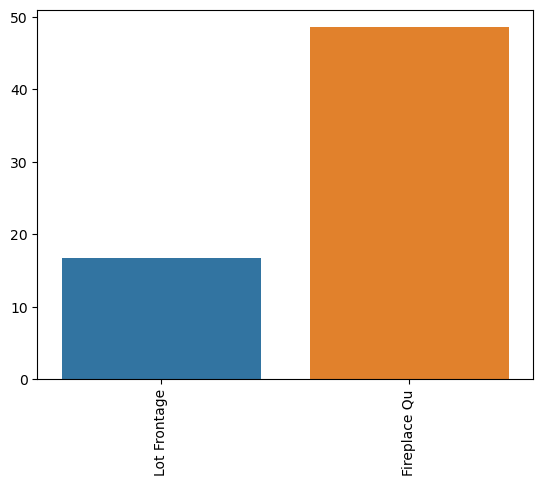

In [87]:
sns.barplot(x=missing_data_percent.index,y=missing_data_percent)
plt.xticks(rotation=90);

now we have just  2 features with missing data, but looking at this we notice that they both have just enough data to keep the feature because not enough of it is missing. now we must look for a way to fill in the missing data. let us explore them individually.

In [88]:
Raw_Housing_Data["Fireplace Qu"].value_counts()

Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

fireplace seems to be categorical and from the information on the dataset Missing values means there is no fireplace i can then go ahead to fill it out with the string none

In [89]:
Raw_Housing_Data['Fireplace Qu'] = Raw_Housing_Data['Fireplace Qu'].fillna("None")

In [90]:
missing_data_percent = percent_missing(Raw_Housing_Data)
missing_data_percent

Lot Frontage    16.752137
dtype: float64

now the only feature with missing data is the lot frontage, lets explore it further. since it is numerical, we can not fill it by creating a new category like none. we could fill it out with 0 but a smarter thing to do will be to use some sort of staticstic to fill it out.

To impute missing data, we need to decide what other filled in (no NaN values) feature most probably relates and is correlated with the missing feature data. In this particular case we will use:

Neighborhood: Physical locations within Ames city limits

LotFrontage: Linear feet of street connected to property

We will operate under the assumption that the Lot Frontage is related to what neighborhood a house is in.

In [91]:
Raw_Housing_Data["Neighborhood"].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      92
NoRidge     71
Timber      71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

we can fill in the missing lot frontage with the average of the lot frontage of that neigbourhood

In [94]:
Raw_Housing_Data.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [95]:
Raw_Housing_Data["Lot Frontage"] = Raw_Housing_Data.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [96]:
Raw_Housing_Data.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      3
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

we can see that just we have just 3 data points what could not be filled based on the neigborhood. we could just fill those out with 0 and with that we have filled out all the missing points in our dataset

In [97]:
Raw_Housing_Data["Lot Frontage"] = Raw_Housing_Data["Lot Frontage"].fillna(0)

In [98]:
Raw_Housing_Data.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [99]:
missing_data_percent = percent_missing(Raw_Housing_Data)
missing_data_percent

Series([], dtype: float64)

now our datset has no missing values, we can work on the features themselves


### DEALING WITH CATEGORICAL DATA

some categories in our dataset are not useful to the model we are working with, linear regression can not apply a a Beta Coefficent to strings, to use these categories in our dataset for training the model we need to convert these categories into "dummy" variables, otherwise known as "one-hot" encoding.

let us take a look at the MSSubClass feature of our dataset.

the feature is coded with integers and that implies some sort of linear relationship between the values. to mitigate that we can convert it along with other similar features using 1 hot encoding.


In [102]:
# convert numeric features that might infer some type of linear relationship
Raw_Housing_Data["MS SubClass"]=Raw_Housing_Data["MS SubClass"].apply(str)

In [101]:
# seperate the datafame by numeric and string features
Raw_Housing_Data_numeric = Raw_Housing_Data.select_dtypes(exclude='object')
Raw_Housing_Data_string = Raw_Housing_Data.select_dtypes(include='object')

In [103]:
# convert the string features using 1 hot encoding
Raw_Housing_Data_string = pd.get_dummies(Raw_Housing_Data_string,drop_first=True)

In [105]:
# join the converted string features to the numeric features
cleaned_Housing_data = pd.concat([Raw_Housing_Data_string,Raw_Housing_Data_numeric],axis=1)

In [108]:
cleaned_Housing_data

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,0,0,0,0,1,0,0,0,0,0,...,210,62,0,0,0,0,0,5,2010,215000
1,0,0,0,0,1,0,0,0,0,0,...,140,0,0,0,120,0,0,6,2010,105000
2,0,0,0,0,1,0,0,0,0,0,...,393,36,0,0,0,0,12500,6,2010,172000
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,4,2010,244000
4,0,0,0,0,0,0,0,0,0,1,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0,0,0,0,0,0,0,0,0,0,...,120,0,0,0,0,0,0,3,2006,142500
2926,0,0,0,0,1,0,0,0,0,0,...,164,0,0,0,0,0,0,6,2006,131000
2927,0,0,0,0,0,0,0,0,0,0,...,80,32,0,0,0,0,700,7,2006,132000
2928,0,0,0,0,1,0,0,0,0,0,...,240,38,0,0,0,0,0,4,2006,170000


In [109]:
cleaned_Housing_data.corr()["SalePrice"].sort_values()

Exter Qual_TA       -0.591459
Kitchen Qual_TA     -0.527461
Fireplace Qu_None   -0.481740
Bsmt Qual_TA        -0.453022
Garage Finish_Unf   -0.422363
                       ...   
Garage Cars          0.648488
Total Bsmt SF        0.660983
Gr Liv Area          0.727279
Overall Qual         0.802637
SalePrice            1.000000
Name: SalePrice, Length: 274, dtype: float64

In [110]:
# save the cleaned data that will be used for the model.
cleaned_Housing_data.to_csv('../DATA/AMES_Cleaned_DF.csv')